In [1]:
from configs import CFG1, TextBoxCFG, ImageCFG, Point
from generators import generate_data
from generation_utils import get_tiled_option_cfgs
from utils import split_sentence

In [2]:
import pandas as pd

messages = pd.read_csv("texts/message_samples.csv")
names = pd.read_csv("texts/name_samples.csv")
messages.shape, names.shape

((14, 5), (10, 5))

<ruby>胡麻<rt>ごま</rt></ruby>すり<ruby>機<rt>き</rt></ruby>です。あ、これはちょっと違いますね......ああ!やっぱりありましたか?それならいいのですけど......。それにしてもこの<ruby>台形<rt>だいけい</rt></ruby>のお<ruby>皿<rt>さら</rt></ruby>に盛り付けるのに<ruby>一苦労<rt>いちくろう</rt></ruby>ですねえ。......<ruby>私<rt>わたくし</rt></ruby>では<ruby>無理<rt>むり</rt></ruby>そうです
<ruby>後川 寅吉<rt>そのかわ とらきち</rt></ruby>
<ruby>猿辺川<rt>さるへんかわ</rt></ruby>の<ruby>下流<rt>かりゅう</rt></ruby>の<ruby>石寺<rt>いしでら</rt></ruby>と<ruby>西側<rt>にしがわ</rt></ruby>の<ruby>梅戸城<rt>うめとじょう</rt></ruby>は、<ruby>我<rt>われ</rt></ruby>らの<ruby>領分<rt>りょうぶん</rt></ruby>です。
お蔭<ruby>様<rt>さま</rt></ruby>で<ruby>一気<rt>いっき</rt></ruby>に、ここまで来られました。
<ruby>貧乏神<rt>びんぼうかみ</rt></ruby>と<ruby>喧嘩<rt>けんか</rt></ruby>しても、どうせ負けるから。
<ruby>精麦<rt>せいばく</rt></ruby>も出来るし、<ruby>精酒<rt>せいしゅ</rt></ruby>にもできる。
思い付きだけで動くのじゃぞ。
<ruby>精麦<rt>せいばく</rt></ruby>も出来るし、<ruby>精酒<rt>せいしゅ</rt></ruby>にもできる。
<ruby>静謐<rt>せいひつ</rt></ruby>の<ruby>魔導具<rt>まどうぐ</rt></ruby>は<ruby>魔法力<rt>まほうりょく</rt></ruby>を通すことで、その<ruby>場<rt>ば</rt></ruby>の<ruby>空気<rt>くうき</rt></ruby>を<ruby>振動<rt>しんどう</rt></ru

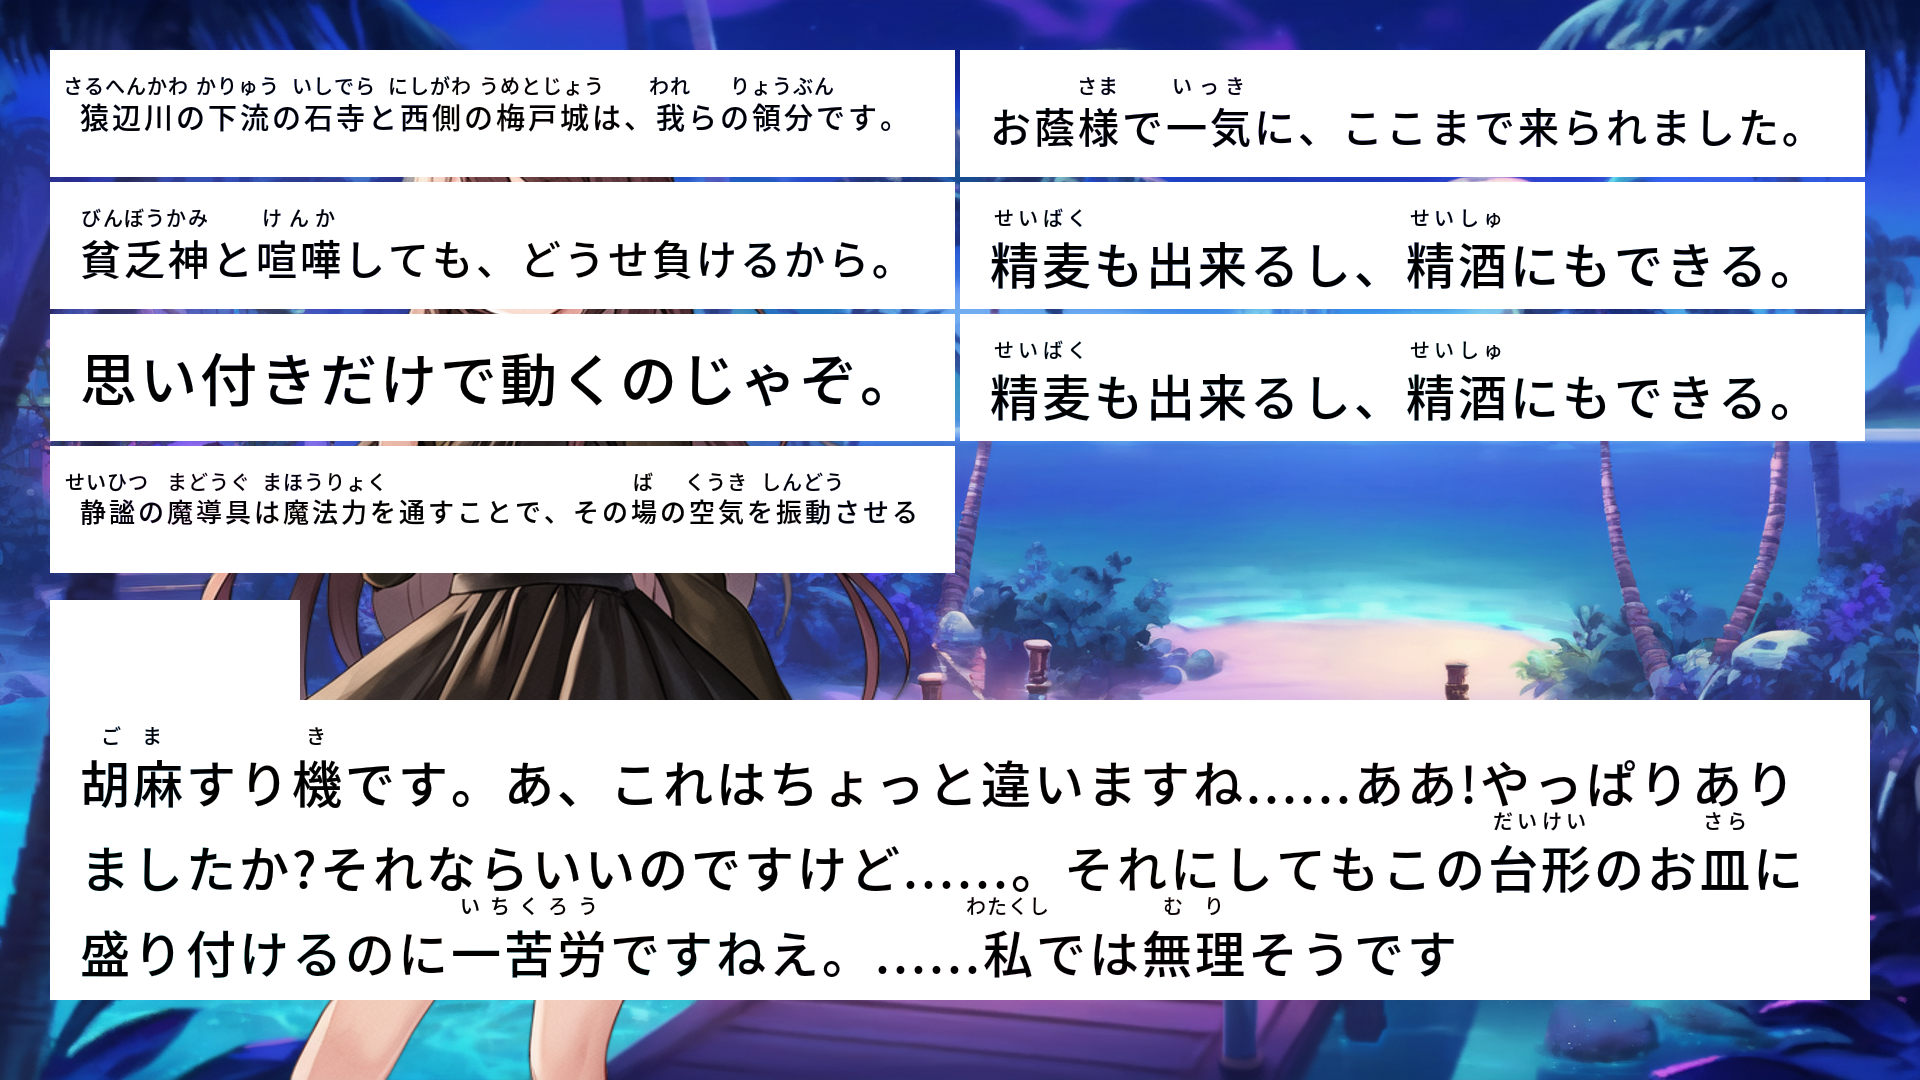

In [3]:
cfg = CFG1()

# 背景画像
cfg.bg_cfg = ImageCFG(path="./sample_images/sample_bg.png")

# キャラクター画像
cfg.character_cfg_list = [
    ImageCFG(path="./sample_images/sample_character.png", tl=Point(200, 0))
    ]

# メッセージ
text = messages.sample(1)["text_ruby_hiragana"].values[0]
cfg.msgbox.text = text
cfg.msgbox.tl = Point(50, 700)
cfg.msgbox.br = Point(1870, 1000)
print(text)

# 名前
name_text = names.sample(1)["text_ruby_hiragana"].values[0]
cfg.namebox.text = name_text
cfg.namebox.tl = Point(50, 600)
cfg.namebox.br = Point(300, 600 + cfg.namebox.minheight)
print(name_text)

# 選択肢
optionbox_list = []
for i in range(7):
    option_text = split_sentence(messages.sample(1)["text_ruby_hiragana"].values[0])[0]
    option_cfg = TextBoxCFG()
    option_cfg.text = option_text
    option_cfg.change_font_size(25)
    option_cfg.tl = Point(300, 200)
    option_cfg.br = Point(1620, 200 + option_cfg.minheight*5)
    print(option_text)
    optionbox_list.append(option_cfg)
cfg.optionbox_list = get_tiled_option_cfgs(
    nrow=4, ncol=2, tl=Point(x=50, y=50), br=Point(x=1870, y=580), cfgs=optionbox_list,
    margin_h=5, margin_w=5
    )
output = generate_data(cfg)

display(output.image)

In [4]:
output.name_text, output.text, output.option_texts

(None,
 '胡麻すり機です。あ、これはちょっと違いますね......ああ!やっぱりありましたか?それならいいのですけど......。それにしてもこの台形のお皿に盛り付けるのに一苦労ですねえ。......私では無理そうです',
 ['猿辺川の下流の石寺と西側の梅戸城は、我らの領分です。',
  'お蔭様で一気に、ここまで来られました。',
  '貧乏神と喧嘩しても、どうせ負けるから。',
  '精麦も出来るし、精酒にもできる。',
  '思い付きだけで動くのじゃぞ。',
  '精麦も出来るし、精酒にもできる。',
  '静謐の魔導具は魔法力を通すことで、その場の空気を振動させる'])